In [1]:
import sys
sys.path.append('..')
from DE import DE
from objective_functions import MSE
from data import create_3d_gauss_data
from data import create_simple_data
from visualizer import plot_2d_gauss, plot_simple_data
import numpy as np
from Network import NeuralNetwork

# Neural Network DE: Simple Problem

0: cost= 0.06488
0: testcost= 0.10071



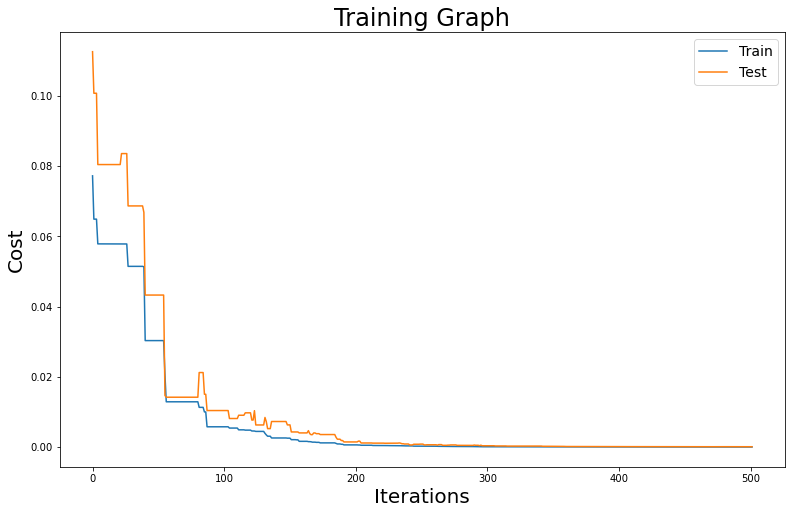

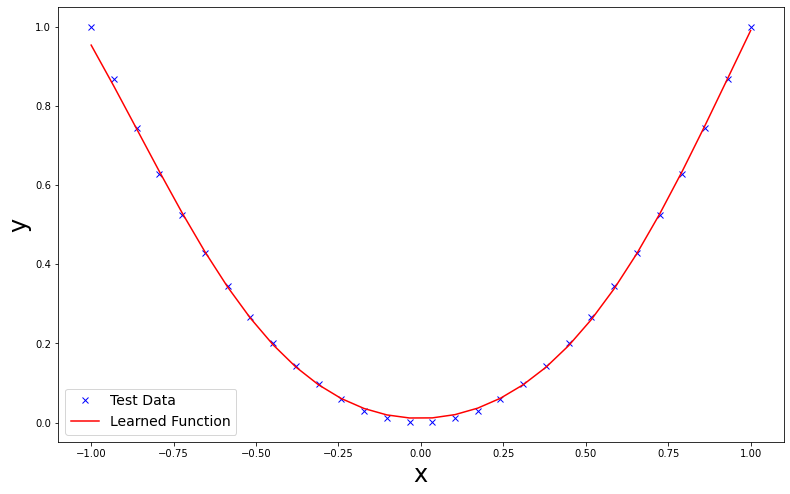

Best agent is <Network.NeuralNetwork object at 0x1a4193e828> with a train cost of 3e-05.
And a test cost of 0.00011


In [11]:
Xtrain, ytrain, Xtest, ytest = create_simple_data('parabola', 30, noise=0)

D = DE(objective_function=MSE, sizes=[1,2,1], pop_size=50, afunc='tanh', F=0.55, cr=0.85, 
        X=Xtrain, y=ytrain, Xtest=Xtest, ytest=ytest, type='regression')

#best_agent, opt_agent = D.early_stop_training(patience=1000)
best_agent = D.evolution(num_epochs=501, verbose=True, print_epoch=1000)
D.evaluate(plot_function=plot_simple_data, title=r'Fit of $y = x^2$')

# Neural Network DE: 3D Gaussian

In [ ]:
Xtrain, ytrain, Xtest, ytest = create_3d_gauss_data(mu=[0,0], sigma=[1,1], num_data_points=600)

D = DE(objective_function=MSE, sizes=[2,20,1], pop_size=50, F=0.55, cr=0.85, 
        X=Xtrain, y=ytrain, Xtest=Xtest, ytest=ytest, type='regression', softmax=False)

best_agent = D.evolution(num_epochs=30001, verbose=True, print_epoch=1000)
D.evaluate(plot_function=plot_2d_gauss, title='Fit of 2D Gauss', savefig=False)

# Classic DE

In [ ]:
from DE_old import DE as DEO
from objective_functions import paraboloid, ackley
from visualizer import plot_ackley
import matplotlib.pyplot as plt

In [ ]:
D = DEO(objective_function=ackley, bounds=[-5, 5], pop_size=10, num_dimensions=2, F=0.5, cr=0.5)
D.evolution(num_epochs=40)
D.evaluate(plot_function=plot_ackley, bounds=[-5, 5])